<a href="https://colab.research.google.com/github/PaletteofDesign/data-visualization-exercise/blob/main/data_visualization_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as tick

In [3]:
f_name = '/content/US GDP vs Debt.xlsx'
df = pd.read_excel(f_name)
df.head()

,Quarter,Gross Domestic Product ($mil),Total Public Debt ($mil)
0,1947-01-01,243.164,NaN
1,1947-04-01,245.968,NaN
2,1947-07-01,249.585,NaN
3,1947-10-01,259.745,NaN
4,1948-01-01,265.742,NaN


In [4]:
df.isna().sum()

Quarter                           0
Gross Domestic Product ($mil)     0
Total Public Debt ($mil)         77
dtype: int64

In [5]:
df.dropna()

,Quarter,Gross Domestic Product ($mil),Total Public Debt ($mil)
76,1966-01-01,795.734,320999.0
77,1966-04-01,804.981,316097.0
78,1966-07-01,819.638,324748.0
79,1966-10-01,833.302,329319.0
80,1967-01-01,844.170,330947.0
...,...,...,...
289,2019-04-01,21329.877,22023283.0
290,2019-07-01,21540.325,22719402.0
291,2019-10-01,21747.394,23201380.0
292,2020-01-01,21561.139,23223813.0


In [6]:
df.nunique()

Quarter                          295
Gross Domestic Product ($mil)    295
Total Public Debt ($mil)         218
dtype: int64

In [7]:
year = (df['Quarter'] < '2021') & (df['Quarter'] >= '2010')
df[year].head(10)

,Quarter,Gross Domestic Product ($mil),Total Public Debt ($mil)
252,2010-01-01,14721.350,12773123.0
253,2010-04-01,14926.098,13201792.0
254,2010-07-01,15079.917,13561622.0
255,2010-10-01,15240.843,14025215.0
256,2011-01-01,15285.828,14270114.0
257,2011-04-01,15496.189,14343087.0
258,2011-07-01,15591.850,14790340.0
259,2011-10-01,15796.460,15222940.0
260,2012-01-01,16019.758,15606518.0
261,2012-04-01,16152.257,15855037.0


In [8]:
df.tail(10)

,Quarter,Gross Domestic Product ($mil),Total Public Debt ($mil)
285,2018-04-01,20552.653,21195070.0
286,2018-07-01,20742.723,21516058.0
287,2018-10-01,20909.853,21974096.0
288,2019-01-01,21115.309,22027880.0
289,2019-04-01,21329.877,22023283.0
290,2019-07-01,21540.325,22719402.0
291,2019-10-01,21747.394,23201380.0
292,2020-01-01,21561.139,23223813.0
293,2020-04-01,19520.114,26477241.0
294,2020-07-01,21157.635,NaN


In [9]:
df.dtypes

Quarter                          datetime64[ns]
Gross Domestic Product ($mil)           float64
Total Public Debt ($mil)                float64
dtype: object

In [10]:
#df = pd.to_datetime(df['Quarter'])

In [11]:
df.dtypes

Quarter                          datetime64[ns]
Gross Domestic Product ($mil)           float64
Total Public Debt ($mil)                float64
dtype: object

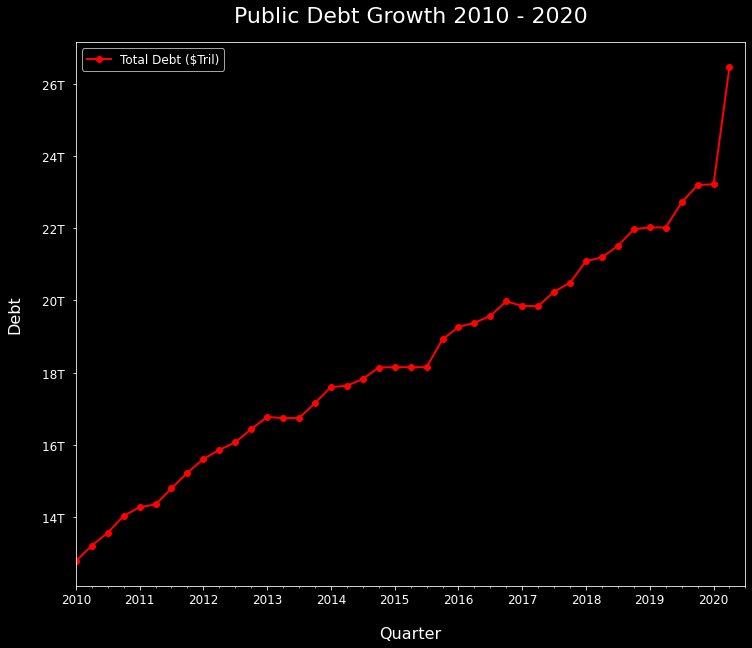

In [16]:
plt.style.use('dark_background')
def y_f(x,y):
    return '{:2.2}'.format(x).replace('e', 'T').replace('.', '').replace('+07', ' ').replace('2T', '20T').replace('220T', '22T').replace('120T', '12T')
df[year].plot.line(x='Quarter', y='Total Public Debt ($mil)', marker='.', markersize=12, figsize=(12,10), 
                   grid=False, c='r', linewidth=2).yaxis.set_major_formatter(tick.FuncFormatter(y_f))
plt.title('Public Debt Growth 2010 - 2020', fontsize=22, pad=20)
plt.legend(labels=['Total Debt ($Tril)'], loc='upper left', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Quarter', fontsize=16, labelpad=20)
plt.ylabel('Debt', fontsize=16, labelpad=20)
plt.savefig('PDG')